In [ ]:
import pandas as pd
df = pd.read_csv('/content/sample_data/Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
# Pisahkan Atribut dan label, ketika X hanya memiliki 1 atribut maka hrs gunakan numpy
import numpy as np
X = df[['YearsExperience']].to_numpy() #atau .values
y = df['Salary']
#mengubah bentuk atribut
# X = X[:,np.newaxis] #deprecated
# print(X)

In [ ]:
# SVR
from sklearn.svm import SVR

# membangun model dengan parameter C, gamma, dan kernel
model = SVR(C=1000, gamma=0.5, kernel='rbf')

# melatih model dengan fungsi fit
model.fit(X, y)

SVR(C=1000, gamma=0.5)

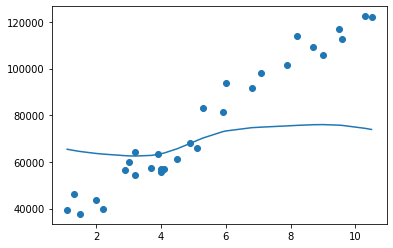

In [ ]:
# memvisualisasikan dengan plot scatter
import matplotlib.pyplot as plt

# scatter
plt.scatter(X, y)
#plot (garis)
plt.plot(X, model.predict(X))

# Hasil data belum bisa menyesuaikan dengan baik, tingkatkan peforma dengan grid search (modul berikutnya)

In [ ]:
# grid search 
#import dan pisah tabel sudah dilakukan diatas

from sklearn.model_selection import GridSearchCV

In [57]:
# SVR
from sklearn.svm import SVR

# membangun model dengan parameter C, gamma, dan kernel
# model = SVR(C=1000, gamma=0.5, kernel='rbf')
model = SVR()
parameters = {
    'kernel' : ['rbf'],
    'C' : [1000,10000,100000],
    'gamma' : [0.5, 0.05,0.005]
}
grid_search = GridSearchCV(model, parameters)

# melatih model dengan fungsi fit
# model.fit(X, y)
grid_search.fit(X, y)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1000, 10000, 100000],
                         'gamma': [0.5, 0.05, 0.005], 'kernel': ['rbf']})

In [ ]:
# menampilkan parameter terbaik dari objek grid_search
print(grid_search.best_params_)

{'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}


In [ ]:
# membuat model SVM baru dengan parameter terbaik hasil grid search
model_baru  = SVR(C=100000, gamma=0.005, kernel='rbf')
model_baru.fit(X,y)

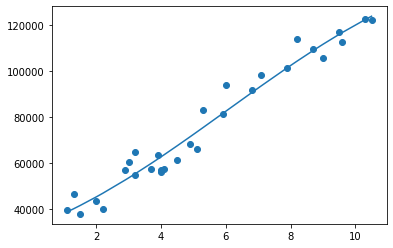

In [ ]:
#menampilkan data
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, model_baru.predict(X))